In [36]:
import pyforest

In [7]:
import sklearn
import pandas as pd

In [11]:
pd.set_option('display.max_rows', None)

# Data 

In [2]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [12]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
cancer.data.shape

(569, 30)

In [13]:
type(cancer)

sklearn.utils.Bunch

In [15]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [18]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [19]:
df.shape

(569, 30)

In [21]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [25]:
scaled_data = scaler.transform(df)

In [26]:
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [28]:
df_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


# PCA

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)

In [32]:
pca.fit(df_scaled)

PCA(n_components=2)

In [34]:
df_scaled.shape

(569, 30)

In [35]:
x_scaled = pca.transform(df_scaled)
x_scaled.shape

(569, 2)

In [37]:
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[]

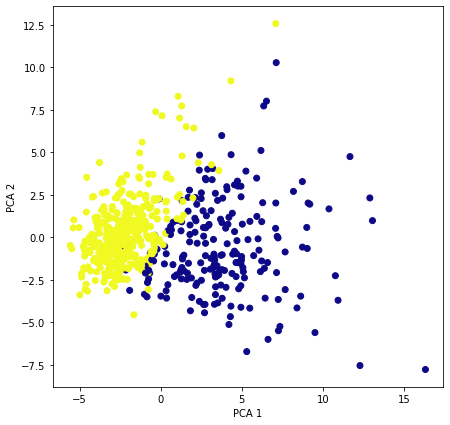

In [43]:
plt.figure(figsize=(7,7))
plt.scatter(x_scaled[:,0], x_scaled[:,1],  c=cancer.target, cmap='plasma')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.plot()

# PCA data analysis - for my understanding

In [44]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

### Getting EIGEN VECTORS using 'components_'

In [45]:
pca.components_.shape

(2, 30)

### Getting EIGEN VALUES

### PCA1 explains 13% amount of varaince <br> PCA2 explains 5.7% amount of variance in the data

In [84]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

In [46]:
pca.transform(pca.components_)

array([[ 1.00000000e+00, -1.02684415e-15],
       [ 2.84457148e-15,  1.00000000e+00]])

In [48]:
n_pcs= pca.components_.shape[0]
n_pcs


2

In [52]:
imp_feature = [np.abs(pca.components_[pca_i]).argmax() for pca_i in range(n_pcs)]
imp_feature

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[7, 9]

In [60]:
for idx, pca_feature_idx in enumerate(imp_feature):
    print(f'PCA {idx} selected feature is : {df.columns[pca_feature_idx]}')

PCA 0 selected feature is : mean concave points
PCA 1 selected feature is : mean fractal dimension


# Using PCA library

https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis

In [ ]:
!pip install PCA

In [93]:
from pca import pca

In [95]:
pca_model = pca()

In [96]:
pca_model.fit_transform(df_scaled)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [30] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


{'loadings':       mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 PC1      0.218902      0.103725        0.227537   0.220995         0.142590   
 PC2     -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
 PC3     -0.008531      0.064550       -0.009314   0.028700        -0.104292   
 PC4      0.041409     -0.603050        0.041983   0.053434         0.159383   
 PC5      0.037786     -0.049469        0.037375   0.010331        -0.365089   
 PC6      0.018741     -0.032179        0.017308  -0.001888        -0.286374   
 PC7     -0.124088      0.011400       -0.114477  -0.051653        -0.140669   
 PC8     -0.007452      0.130675       -0.018687   0.034674        -0.288975   
 PC9     -0.223110      0.112699       -0.223739  -0.195586         0.006425   
 PC10     0.095486      0.240934        0.086386   0.074956        -0.069293   
 PC11     0.041471     -0.302243        0.016783   0.110170        -0.137022   
 PC12     0.051067      0.25

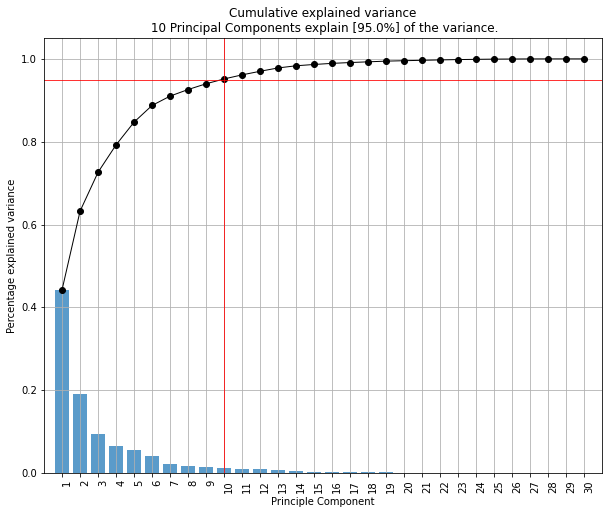

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 10 Principal Components explain [95.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [97]:
pca_model.plot()

In [107]:
pca_model.compute_topfeat()

,PC,feature,loading,type
0,PC1,mean concave points,0.260854,best
1,PC2,mean fractal dimension,0.366575,best
2,PC3,texture error,0.374634,best
3,PC4,worst texture,-0.632808,best
4,PC5,mean smoothness,-0.365089,best
5,PC6,worst symmetry,0.498927,best
6,PC7,worst fractal dimension,0.374658,best
7,PC8,smoothness error,0.573410,best
8,PC9,concavity error,0.358107,best
9,PC10,mean symmetry,0.572069,best


# My Own Test Code

In [76]:
my_data = np.array([[1,3, 1, 2], [2,2, 0,1], [3,1,2,1]])
my_data

<IPython.core.display.Javascript object>

array([[1, 3, 1, 2],
       [2, 2, 0, 1],
       [3, 1, 2, 1]])

In [82]:
my_data_T = my_data.T
my_data_T

array([[1, 2, 3],
       [3, 2, 1],
       [1, 0, 2],
       [2, 1, 1]])

In [83]:
np.cov(my_data_T[3])

<IPython.core.display.Javascript object>

array(0.33333333)

In [98]:
pca_model1 = pca()

In [99]:
pca_model1.fit_transform(my_data
                         )

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


{'loadings':             1         2         3         4
 PC1  0.617711 -0.617711  0.398888 -0.278845
 PC2  0.187349 -0.187349 -0.870376 -0.415025
 PC3 -0.706611 -0.707601 -0.000495  0.001485,
 'PC':           PC1       PC2
 1.0 -1.421319 -0.651381
 1.0 -0.305939  1.008718
 1.0  1.727258 -0.357337,
 'explained_var': array([0.76457513, 1.        , 1.        ]),
 'model': PCA(),
 'scaler': None,
 'pcp': 0.95,
 'topfeat':     PC feature   loading  type
 0  PC1       1  0.617711  best
 1  PC2       3 -0.870376  best
 2  PC3       2 -0.707601  best
 3  PC2       4 -0.415025  weak,
 'outliers':       y_proba   y_score  y_bool  y_bool_spe  y_score_spe
 1.0  0.319246  4.702151   False       False     1.563472
 1.0  0.611944  2.684421   False       False     1.054093
 1.0  0.267740  5.196323   False       False     1.763834,
 'outliers_params': {'paramT2': (2.7755575615628914e-17, 1.1111111111111114),
  'paramSPE': (array([ 0.00000000e+00, -1.85037171e-17]),
   array([[ 2.54858377e+00, -1.75902

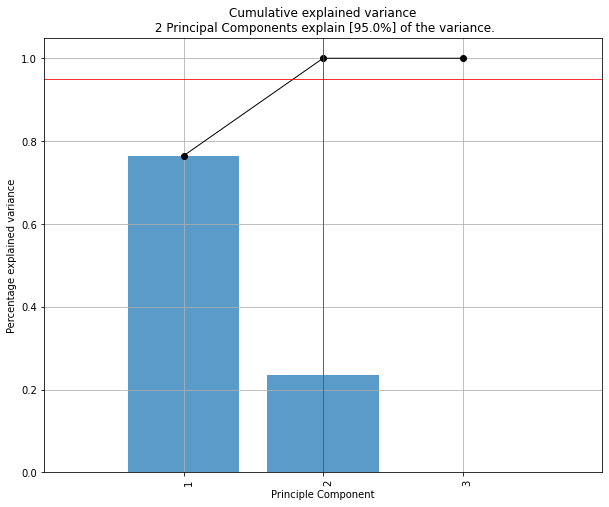

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 2 Principal Components explain [95.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [100]:
pca_model1.plot()

In [101]:
pca_model1.results

{'loadings':             1         2         3         4
 PC1  0.617711 -0.617711  0.398888 -0.278845
 PC2  0.187349 -0.187349 -0.870376 -0.415025
 PC3 -0.706611 -0.707601 -0.000495  0.001485,
 'PC':           PC1       PC2
 1.0 -1.421319 -0.651381
 1.0 -0.305939  1.008718
 1.0  1.727258 -0.357337,
 'explained_var': array([0.76457513, 1.        , 1.        ]),
 'model': PCA(),
 'scaler': None,
 'pcp': 0.95,
 'topfeat':     PC feature   loading  type
 0  PC1       1  0.617711  best
 1  PC2       3 -0.870376  best
 2  PC3       2 -0.707601  best
 3  PC2       4 -0.415025  weak,
 'outliers':       y_proba   y_score  y_bool  y_bool_spe  y_score_spe
 1.0  0.319246  4.702151   False       False     1.563472
 1.0  0.611944  2.684421   False       False     1.054093
 1.0  0.267740  5.196323   False       False     1.763834,
 'outliers_params': {'paramT2': (2.7755575615628914e-17, 1.1111111111111114),
  'paramSPE': (array([ 0.00000000e+00, -1.85037171e-17]),
   array([[ 2.54858377e+00, -1.75902